In [13]:
import json

# Load the data from the file
file_path = '../data/raw/ms_marco_eda.txt'

with open(file_path, 'r', encoding='utf-8') as file:
    data = file.readlines()

print('Data loaded successfully!')

# Pretty print the first line of the data

print('First line of the data:')
print(data[0])
print('Length of the data:')
print(len(data))
print('First 5 lines of the data:')
for i in range(5):
    print(data[i])

Data loaded successfully!
First line of the data:
{"answers": ["Results-Based Accountability is a disciplined way of thinking and taking action that communities can use to improve the lives of children, youth, families, adults and the community as a whole."], "passages": {"is_selected": [0, 0, 0, 0, 0, 1, 0, 0, 0, 0], "passage_text": ["Since 2007, the RBA's outstanding reputation has been affected by the 'Securency' or NPA scandal. These RBA subsidiaries were involved in bribing overseas officials so that Australia might win lucrative note-printing contracts. The assets of the bank include the gold and foreign exchange reserves of Australia, which is estimated to have a net worth of A$101 billion. Nearly 94% of the RBA's employees work at its headquarters in Sydney, New South Wales and at the Business Resumption Site.", "The Reserve Bank of Australia (RBA) came into being on 14 January 1960 as Australia 's central bank and banknote issuing authority, when the Reserve Bank Act 1959 remo

In [14]:
from collections import defaultdict
import json

# Group lines by the number of passages
grouped_lines = defaultdict(list)

for line in data:
    parsed_line = json.loads(line)
    num_passages = len(parsed_line['passages']['passage_text'])
    grouped_lines[num_passages].append(parsed_line)

# Print the grouping result
for num_passages, lines in grouped_lines.items():
    print(f"Number of passages: {num_passages}, Number of lines: {len(lines)}")

# Plot the distribution of the number of passages


Number of passages: 10, Number of lines: 14335
Number of passages: 7, Number of lines: 10239
Number of passages: 9, Number of lines: 27378
Number of passages: 8, Number of lines: 19682
Number of passages: 6, Number of lines: 5854
Number of passages: 4, Number of lines: 1249
Number of passages: 5, Number of lines: 3224
Number of passages: 3, Number of lines: 316
Number of passages: 2, Number of lines: 43
Number of passages: 12, Number of lines: 2
Number of passages: 1, Number of lines: 3
Number of passages: 11, Number of lines: 1


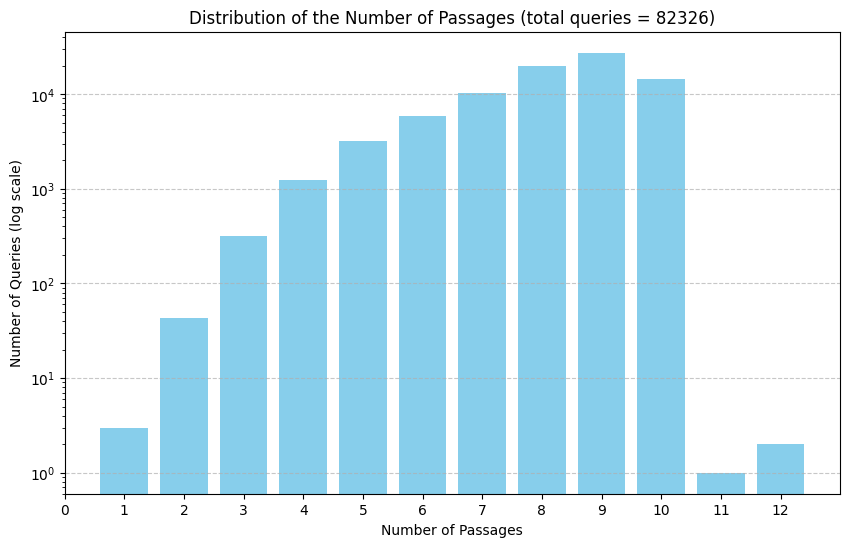

In [17]:
plt.figure(figsize=(10, 6))
plt.bar(sorted_distribution.keys(), sorted_distribution.values(), color='skyblue')
plt.xlabel('Number of Passages')
plt.ylabel('Number of Queries (log scale)')
plt.title(f'Distribution of the Number of Passages (total queries = {len(data)})')
plt.xticks(np.arange(0, max(sorted_distribution.keys()) + 1, step=1))
plt.yscale('log')  # Set y-axis to log scale
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()


In [ ]:
# Count the number of queries with no is_selected = 1
queries_with_no_selected = sum(
    all(is_selected != 1 for is_selected in json.loads(query)['passages']['is_selected'])
    for query in data
)

Number of queries with no is_selected = 1: 2622
IDs of queries with no is_selected = 1: [19706, 19724, 19860, 19865, 19919, 19975, 20011, 20079, 20150, 20195, 20222, 20236, 20247, 20251, 20253, 20267, 20301, 20334, 20358, 20361, 20380, 20392, 20404, 20431, 20476, 20489, 20537, 20547, 20567, 20577, 20597, 20624, 20692, 20697, 20741, 20763, 20768, 20771, 20791, 20792, 20925, 20965, 20997, 21014, 21039, 21045, 21050, 21051, 21118, 21180, 21258, 21298, 21325, 21359, 21452, 21465, 21472, 21485, 21517, 21628, 21635, 21644, 21646, 21735, 21761, 21781, 21783, 21788, 21893, 21902, 21922, 21957, 22031, 22045, 22083, 22101, 22124, 22155, 22178, 22197, 22216, 22234, 22270, 22274, 22291, 22295, 22297, 22307, 22341, 22428, 22498, 22623, 22716, 22728, 22766, 22780, 22786, 22813, 22815, 22842, 22853, 22989, 23000, 23051, 23092, 23174, 23192, 23272, 23347, 23417, 23437, 23477, 23524, 23609, 23611, 23620, 23645, 23657, 23693, 23729, 23739, 23848, 23865, 23877, 23885, 23921, 23981, 24013, 24042, 24052, 2

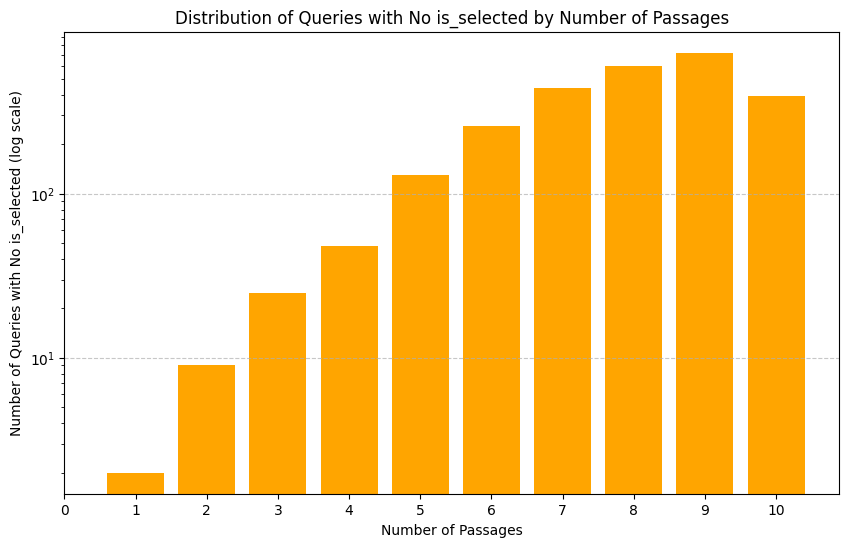

In [19]:
# Count the number of queries with no is_selected = 1 grouped by the number of passages
no_selected_distribution = defaultdict(int)

for query in data:
    parsed_query = json.loads(query)
    if all(is_selected != 1 for is_selected in parsed_query['passages']['is_selected']):
        num_passages = len(parsed_query['passages']['passage_text'])
        no_selected_distribution[num_passages] += 1

# Plot the distribution
plt.figure(figsize=(10, 6))
plt.bar(no_selected_distribution.keys(), no_selected_distribution.values(), color='orange')
plt.xlabel('Number of Passages')
plt.ylabel('Number of Queries with No is_selected (log scale)')
plt.title('Distribution of Queries with No is_selected by Number of Passages')
plt.yscale('log')  # Set y-axis to log scale
plt.xticks(np.arange(0, max(no_selected_distribution.keys()) + 1, step=1))
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()